# The Battle of the Neighborhoods - Week 2
## Japanese Cousine in New York

## Introduction

New York City’s demographics show that it is a large and ethnically diverse metropolis. It is the largest city in the United States with a long history of international immigration. New York City was home to nearly 8.5 million people in 2014, accounting for over 40% of the population of New York. As of the 2000 Census, over half of the 37,279 people of Japanese ancestry in the U.S. state of New York lived in New York City.

As part of the final project , I have chosen to explore Japanese restaurants in the city of New York.
New York is a rich and diverse metropolis, being home to the largest Japanese community on the East Coast of the United States. Being a prominent outpost of Japanese culture, it has inumerous japanese restaurants.
As my project , i opted to list and visualise the areas with the most concentration of them and it's overall quality.

## Data

#### New York City Dataset, containing Boroughs, Neighborhoods and their latitude and longitude.
>https://cocl.us/new_york_dataset

#### Japanese Restaurants in New York and their location and scores
>Fousquare API

#### GeoSpace Data, for generating choropleth maps
>https://data.cityofnewyork.us/api/geospatial/tqmj-j8zm?method=export&format=GeoJSON

### Aproach

* Process and Clean the data from New York
* Link and Query data using the Foursquare API, finding all restaurants in the Area
* Process and Filter the Restaurants data, selecting only the Japanese ones
* Sort neighborhoods by the Quantity and Quality of Restaurants
* Generate data visualization of the results

### Analysis


### Importing the Libraries

In [1]:
#Pandas and Numpy for Datasets
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#Requests and BeautifulSoup for Filtering and Processing Text Informatiom
import requests
! pip install BeautifulSoup4
from bs4 import BeautifulSoup

#Geocoder and Folium for Coordenates and Maps
!pip install geocoder
import geocoder
import os
import folium 
!pip install geopy
from geopy.geocoders import Nominatim 

#MatPlotLib for Data Visualization
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline

print('Libraries Imported!')

Libraries Imported!


### Obtaining the New York Data

#### Function get_nydata

In [2]:
def get_nydata():
    url='https://cocl.us/new_york_dataset'
    resp=requests.get(url).json()
    features=resp['features']
    
    column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
    nydata = pd.DataFrame(columns=column_names)
    
    for data in features:
        borough = data['properties']['borough'] 
        neighborhood_name = data['properties']['name']
        
        neighborhood_latlon = data['geometry']['coordinates']
        neighborhood_lat = neighborhood_latlon[1]
        neighborhood_lon = neighborhood_latlon[0]
    
        nydata = nydata.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
    
    return nydata

#### Calling the get_nydata Function and Showing it's results

In [3]:
nydata=get_nydata()

In [4]:
nydata.head()

Borough Neighborhood   Latitude  Longitude
0   Bronx    Wakefield  40.894705 -73.847201
1   Bronx   Co-op City  40.874294 -73.829939
2   Bronx  Eastchester  40.887556 -73.827806
3   Bronx    Fieldston  40.895437 -73.905643
4   Bronx    Riverdale  40.890834 -73.912585

In [6]:
nydata.shape

(306, 4)

There's __306__ different Neighborhoods in the Dataset

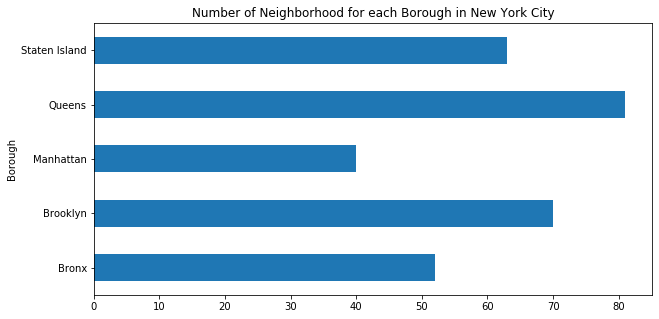

In [7]:
plt.figure(figsize=(10,5))
plt.title('Number of Neighborhood for each Borough in New York City')
plt.xlabel('')
plt.ylabel('')
nydata.groupby('Borough')['Neighborhood'].count().plot(kind='barh')
plt.show()

In [8]:
nydata[nydata['Borough']=='Queens'].count()

Borough         81
Neighborhood    81
Latitude        81
Longitude       81
dtype: int64

__Queens__ is the Borough with more Neighborhoods, with __81__ in total

___

### Connecting to the Foursquare API and stablishing the Functions get_venues and get_venue_details

In [ ]:
def get_venues(lat,lng):
    
    #set variables
    radius=1000
    LIMIT=100
    CLIENT_ID = #'YOUR FOURSQUARE ID'
    CLIENT_SECRET = #'YOUR FOURSQUARE SECRET'
    VERSION = '20190605'
    
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results["response"]['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
        
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

In [ ]:
def get_venue_details(venue_id):
        
    CLIENT_ID = #'YOUR FOURSQUARE ID'
    CLIENT_SECRET = #'YOUR FOURSQUARE SECRET'
    VERSION = '20190605'
    
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    
    
    # get all the data
    results = requests.get(url).json()

    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
        
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

### Running the Functions and Getting the Data

In [ ]:
column_names=['Borough', 'Neighborhood', 'ID','Name']
jp_rest_ny=pd.DataFrame(columns=column_names)
count=1
for row in nydata.values.tolist():
    Borough, Neighborhood, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    japanese_restaurants=venues[venues['Category']=='Japanese Restaurant']   
    print('(',count,'/',len(nydata),')','Japanese Restaurants in '+Neighborhood+', '+Borough+':'+str(len(japanese_restaurants)))
    for restaurant_detail in japanese_restaurants.values.tolist():
        id, name , category=restaurant_detail
        jp_rest_ny = jp_rest_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    count+=1;

### Head and Shape from the Dataset

In [10]:
jp_rest_ny.head()

Borough Neighborhood                        ID  \
0   Bronx    Riverdale  503cfaffe4b066d39de5005a   
1   Bronx    Riverdale  4b0b311af964a520642e23e3   
2   Bronx  Kingsbridge  503cfaffe4b066d39de5005a   
3   Bronx  Kingsbridge  4b0b311af964a520642e23e3   
4   Bronx  City Island  4dbdf3d790a02849cbd675be   

                                          Name  
0                     Aoyu Japanese Restaurant  
1                              Palace of Japan  
2                     Aoyu Japanese Restaurant  
3                              Palace of Japan  
4  Ohana Japanese Habachi Seafood & Steakhouse

In [11]:
jp_rest_ny.shape

(194, 4)

We found __194 Japanese Restaurants__ in New York City

___

### Comparing and Visualizing the Data

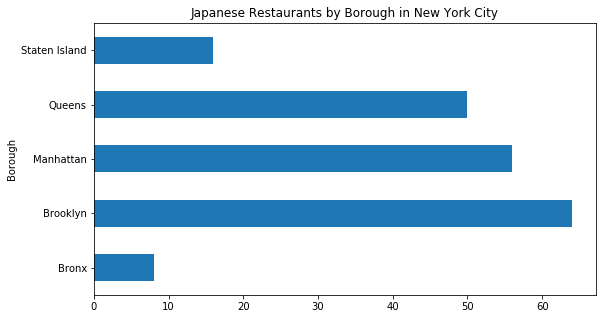

In [12]:
plt.figure(figsize=(9,5)) 
plt.title('Japanese Restaurants by Borough in New York City')
plt.xlabel('')
plt.ylabel('')
jp_rest_ny.groupby('Borough')['ID'].count().plot(kind='barh')
plt.show()

In [13]:
jp_rest_ny[jp_rest_ny['Borough']=='Brooklyn'].count()

Borough         64
Neighborhood    64
ID              64
Name            64
dtype: int64

__Brooklyn__ is the Borough with most Japanese Restaurants, with __64__ found results

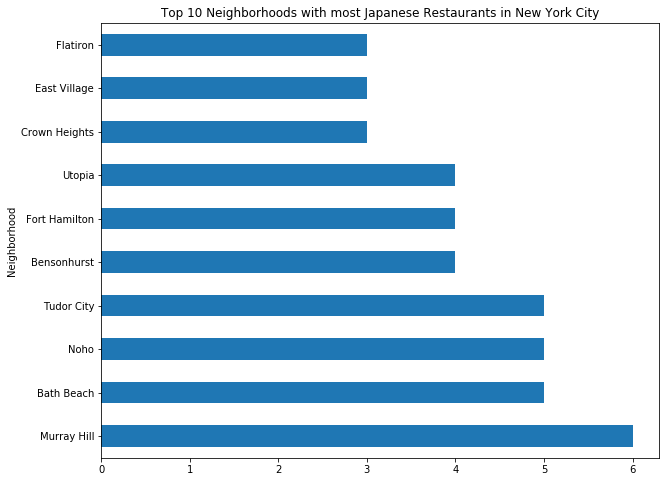

In [14]:
plt.figure(figsize=(10,8))
plt.title('Top 10 Neighborhoods with most Japanese Restaurants in New York City')
plt.xlabel('')
plt.ylabel('')
jp_rest_ny.groupby('Neighborhood')['ID'].count().nlargest(10).plot(kind='barh')
plt.show()

In [15]:
jp_rest_ny[jp_rest_ny['Neighborhood']=='Murray Hill'].count()

Borough         6
Neighborhood    6
ID              6
Name            6
dtype: int64

__Murray Hill__ is the Neighborhood with most Japanese Restaurants, with __6__ found results

### Saving the Dataframe into a .csv File

In [ ]:
jp_rest_ny.to_csv('jp_rest_ny.csv', index=False)

### Loading the Dataframe from the .csv File

In [9]:
jp_rest_ny=pd.read_csv('jp_rest_ny.csv')

____

### Obtaining Likes, Rating and Tips from the Restaurants by the function get_venue_details

In [ ]:
column_names=['Borough', 'Neighborhood', 'ID','Name','Likes','Rating','Tips']
jp_rest_stats_ny=pd.DataFrame(columns=column_names)
count=1


for row in jp_rest_ny.values.tolist():
    Borough,Neighborhood,ID,Name=row
    try:
        venue_details=get_venue_details(ID)
        print(venue_details)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except IndexError:
        print('No data available for id=',ID)
        # we will assign 0 value for these resturants as they may have been 
        #recently opened or details does not exist in FourSquare Database
        id,name,likes,rating,tips=[0]*5
    print('(',count,'/',len(jp_rest_ny),')','processed')
    jp_rest_stats_ny = jp_rest_stats_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)
    count+=1

### Head, Shape and Info from the Dataset

In [17]:
jp_rest_stats_ny.head()

Borough Neighborhood                        ID  \
0   Bronx    Riverdale  503cfaffe4b066d39de5005a   
1   Bronx    Riverdale  4b0b311af964a520642e23e3   
2   Bronx  Kingsbridge  503cfaffe4b066d39de5005a   
3   Bronx  Kingsbridge  4b0b311af964a520642e23e3   
4   Bronx  City Island  4dbdf3d790a02849cbd675be   

                                          Name  Likes  Rating  Tips  
0                     Aoyu Japanese Restaurant   31.0     9.0  19.0  
1                              Palace of Japan   38.0     8.7  25.0  
2                     Aoyu Japanese Restaurant   31.0     9.0  19.0  
3                              Palace of Japan   38.0     8.7  25.0  
4  Ohana Japanese Habachi Seafood & Steakhouse   33.0     7.5  18.0

In [18]:
jp_rest_stats_ny.shape

(194, 7)

Contains info from __194__ Restaurants

In [19]:
jp_rest_stats_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 7 columns):
Borough         194 non-null object
Neighborhood    194 non-null object
ID              194 non-null object
Name            194 non-null object
Likes           194 non-null float64
Rating          194 non-null float64
Tips            194 non-null float64
dtypes: float64(3), object(4)
memory usage: 10.7+ KB


### Converting Likes and Tips to Float

In [20]:
jp_rest_stats_ny['Likes']=jp_rest_stats_ny['Likes'].astype('float64')
jp_rest_stats_ny['Tips']=jp_rest_stats_ny['Tips'].astype('float64')
jp_rest_stats_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 7 columns):
Borough         194 non-null object
Neighborhood    194 non-null object
ID              194 non-null object
Name            194 non-null object
Likes           194 non-null float64
Rating          194 non-null float64
Tips            194 non-null float64
dtypes: float64(3), object(4)
memory usage: 10.7+ KB


### Saving the Dataframe into a .csv File

In [ ]:
jp_rest_stats_ny.to_csv('jp_rest_stats_ny.csv', index=False)

### Loading the Dataframe from the .csv File

In [16]:
jp_rest_stats_ny=pd.read_csv('jp_rest_stats_ny.csv')

_____

### Comparing and Visualizing the Data

#### Most Liked Restaurants in New York

In [21]:
jp_rest_stats_ny.sort_values(['Likes'],ascending=False).head(10)

Borough   Neighborhood                        ID  \
182  Manhattan       Flatiron  4f7b61f6e4b07aaa5d524842   
155  Manhattan  Midtown South  51e8ce40498ea1fb0180efb2   
80   Manhattan    Murray Hill  51e8ce40498ea1fb0180efb2   
57    Brooklyn     North Side  4c7f0887fb74236a7727f9b9   
25    Brooklyn   Williamsburg  4c7f0887fb74236a7727f9b9   
59    Brooklyn     South Side  4c7f0887fb74236a7727f9b9   
82   Manhattan        Chelsea  454f7cc4f964a520dc3c1fe3   
74   Manhattan        Clinton  4ef0d81fbe7ba3ed7c2296d2   
90   Manhattan   West Village  42055e00f964a5206e1f1fe3   
89   Manhattan   West Village  4bc10965abf49521296bc093   

                      Name   Likes  Rating   Tips  
182    OOTOYA 大戸屋 (OOTOYA)  1199.0     9.1  270.0  
155            Izakaya MEW  1023.0     9.0  260.0  
80             Izakaya MEW  1023.0     9.0  260.0  
57            Samurai Mama   888.0     9.1  242.0  
25            Samurai Mama   888.0     9.1  242.0  
59            Samurai Mama   888.0     9.1  242.0  
82                Morimoto   784.0     9.0  354.0  
74   Gyu-Kaku Japanese BBQ   637.0     8.9  162.0  
90   EN Japanese Brasserie   611.0     8.8  255.0  
89                 Takashi   603.0     9.1  207.0

#### Highest Rated Japanese Restaurants in New York

In [22]:
jp_rest_stats_ny.sort_values(['Rating'],ascending=False).head(10)

Borough       Neighborhood                        ID  \
55    Brooklyn  East Williamsburg  52517e05498ec2e28c792fa2   
156  Manhattan      Midtown South  58b8ed467220e661ddf34104   
29    Brooklyn   Brooklyn Heights  48a41073f964a52091511fe3   
84   Manhattan       East Village  5b3805910dd31f002409405a   
150  Manhattan               Noho  5b3805910dd31f002409405a   
153  Manhattan               Noho  510c85e7e4b0056826b88297   
30    Brooklyn        Cobble Hill  48a41073f964a52091511fe3   
170     Queens      Hunters Point  52b470f511d2522f86497c9b   
83   Manhattan       East Village  510c85e7e4b0056826b88297   
181  Manhattan    Stuyvesant Town  510c85e7e4b0056826b88297   

                                     Name  Likes  Rating   Tips  
55                  Brooklyn Ball Factory  292.0     9.4   84.0  
156  KazuNori: The Original Hand Roll Bar  481.0     9.3  119.0  
29                                 Hibino  467.0     9.2  156.0  
84                             Suki Curry   39.0     9.2   11.0  
150                            Suki Curry   39.0     9.2   11.0  
153                                  Kura  207.0     9.2   60.0  
30                                 Hibino  467.0     9.2  156.0  
170                            Hibino LIC  181.0     9.2   49.0  
83                                   Kura  207.0     9.2   60.0  
181                                  Kura  207.0     9.2   60.0

#### Japanese Restaurants in New York with the Most Tips on Foursquare

In [23]:
jp_rest_stats_ny.sort_values(['Tips'],ascending=False).head(10)

Borough   Neighborhood                        ID  \
82   Manhattan        Chelsea  454f7cc4f964a520dc3c1fe3   
182  Manhattan       Flatiron  4f7b61f6e4b07aaa5d524842   
80   Manhattan    Murray Hill  51e8ce40498ea1fb0180efb2   
155  Manhattan  Midtown South  51e8ce40498ea1fb0180efb2   
90   Manhattan   West Village  42055e00f964a5206e1f1fe3   
25    Brooklyn   Williamsburg  4c7f0887fb74236a7727f9b9   
59    Brooklyn     South Side  4c7f0887fb74236a7727f9b9   
57    Brooklyn     North Side  4c7f0887fb74236a7727f9b9   
64   Manhattan      Chinatown  4cf9655334c1a09374cb390e   
152  Manhattan           Noho  4cf9655334c1a09374cb390e   

                      Name   Likes  Rating   Tips  
82                Morimoto   784.0     9.0  354.0  
182    OOTOYA 大戸屋 (OOTOYA)  1199.0     9.1  270.0  
80             Izakaya MEW  1023.0     9.0  260.0  
155            Izakaya MEW  1023.0     9.0  260.0  
90   EN Japanese Brasserie   611.0     8.8  255.0  
25            Samurai Mama   888.0     9.1  242.0  
59            Samurai Mama   888.0     9.1  242.0  
57            Samurai Mama   888.0     9.1  242.0  
64                 Cocoron   523.0     9.0  215.0  
152                Cocoron   523.0     9.0  215.0

#### Top 10 Neighborhoods by Average Rating

In [24]:
neighborhood_stats=jp_rest_stats_ny.groupby('Neighborhood',as_index=False).mean()[['Neighborhood','Rating']]
neighborhood_stats.columns=['Neighborhood','Average Rating']

neighborhood_stats.sort_values(['Average Rating'],ascending=False).head(10)

Neighborhood  Average Rating
98    Stuyvesant Town        9.200000
34  East Williamsburg        9.100000
33       East Village        9.100000
82         North Side        9.100000
96         South Side        9.100000
37           Flatiron        9.066667
81               Noho        9.040000
77      Midtown South        9.033333
18            Chelsea        9.000000
65       Little Italy        9.000000

#### Average Rating of Japanese Restaurants by Borough

In [25]:
borough_stats=jp_rest_stats_ny.groupby('Borough',as_index=False).mean()[['Borough','Rating']]
borough_stats.columns=['Borough','Average Rating']

borough_stats.sort_values(['Average Rating'],ascending=False).head()

Borough  Average Rating
2      Manhattan        8.739286
0          Bronx        8.525000
1       Brooklyn        7.857812
3         Queens        7.156000
4  Staten Island        6.681250

#### Restaurants with an Average Rating Greater or Equal to 9

In [57]:
jp_rest_stats_ny_best=jp_rest_stats_ny[jp_rest_stats_ny['Rating']>=9.0]
jp_rest_stats_ny_best.sort_values('Rating', ascending=False)

Borough        Neighborhood                        ID  \
55    Brooklyn   East Williamsburg  52517e05498ec2e28c792fa2   
156  Manhattan       Midtown South  58b8ed467220e661ddf34104   
84   Manhattan        East Village  5b3805910dd31f002409405a   
170     Queens       Hunters Point  52b470f511d2522f86497c9b   
153  Manhattan                Noho  510c85e7e4b0056826b88297   
83   Manhattan        East Village  510c85e7e4b0056826b88297   
29    Brooklyn    Brooklyn Heights  48a41073f964a52091511fe3   
30    Brooklyn         Cobble Hill  48a41073f964a52091511fe3   
181  Manhattan     Stuyvesant Town  510c85e7e4b0056826b88297   
150  Manhattan                Noho  5b3805910dd31f002409405a   
89   Manhattan        West Village  4bc10965abf49521296bc093   
58    Brooklyn          North Side  49cea29ef964a520685a1fe3   
59    Brooklyn          South Side  4c7f0887fb74236a7727f9b9   
57    Brooklyn          North Side  4c7f0887fb74236a7727f9b9   
25    Brooklyn        Williamsburg  4c7f0887fb74236a7727f9b9   
182  Manhattan            Flatiron  4f7b61f6e4b07aaa5d524842   
183  Manhattan            Flatiron  5bd7a5561c675b0039be9acc   
177  Manhattan          Tudor City  49db8b67f964a520d85e1fe3   
173  Manhattan          Turtle Bay  49db8b67f964a520d85e1fe3   
155  Manhattan       Midtown South  51e8ce40498ea1fb0180efb2   
152  Manhattan                Noho  4cf9655334c1a09374cb390e   
0        Bronx           Riverdale  503cfaffe4b066d39de5005a   
96   Manhattan  Financial District  585c15782b04f80cdd0e9711   
92   Manhattan            Gramercy  581a10901df6b32e66ec3a07   
88   Manhattan        Little Italy  4cf9655334c1a09374cb390e   
2        Bronx         Kingsbridge  503cfaffe4b066d39de5005a   
82   Manhattan             Chelsea  454f7cc4f964a520dc3c1fe3   
80   Manhattan         Murray Hill  51e8ce40498ea1fb0180efb2   
79   Manhattan         Murray Hill  49db8b67f964a520d85e1fe3   
64   Manhattan           Chinatown  4cf9655334c1a09374cb390e   
35    Brooklyn          Park Slope  41478600f964a520c41c1fe3   
23    Brooklyn    Prospect Heights  41478600f964a520c41c1fe3   
6        Bronx      Spuyten Duyvil  503cfaffe4b066d39de5005a   
184  Manhattan            Flatiron  581a10901df6b32e66ec3a07   

                                     Name   Likes  Rating   Tips  
55                  Brooklyn Ball Factory   292.0     9.4   84.0  
156  KazuNori: The Original Hand Roll Bar   481.0     9.3  119.0  
84                             Suki Curry    39.0     9.2   11.0  
170                            Hibino LIC   181.0     9.2   49.0  
153                                  Kura   207.0     9.2   60.0  
83                                   Kura   207.0     9.2   60.0  
29                                 Hibino   467.0     9.2  156.0  
30                                 Hibino   467.0     9.2  156.0  
181                                  Kura   207.0     9.2   60.0  
150                            Suki Curry    39.0     9.2   11.0  
89                                Takashi   603.0     9.1  207.0  
58                               Zenkichi   398.0     9.1  153.0  
59                           Samurai Mama   888.0     9.1  242.0  
57                           Samurai Mama   888.0     9.1  242.0  
25                           Samurai Mama   888.0     9.1  242.0  
182                   OOTOYA 大戸屋 (OOTOYA)  1199.0     9.1  270.0  
183                                  HALL    35.0     9.1    7.0  
177                     Aburiya Kinnosuke   278.0     9.0   90.0  
173                     Aburiya Kinnosuke   278.0     9.0   90.0  
155                           Izakaya MEW  1023.0     9.0  260.0  
152                               Cocoron   523.0     9.0  215.0  
0                Aoyu Japanese Restaurant    31.0     9.0   19.0  
96                              Kome Waza    92.0     9.0   24.0  
92                              Sugarfish   433.0     9.0   99.0  
88                                Cocoron   523.0     9.0  215.0  
2                Aoyu Ja

In [58]:
jp_rest_stats_ny_best.shape

(34, 7)

A total of **34** Japanese Restaurants with a score Greater or Equal 9

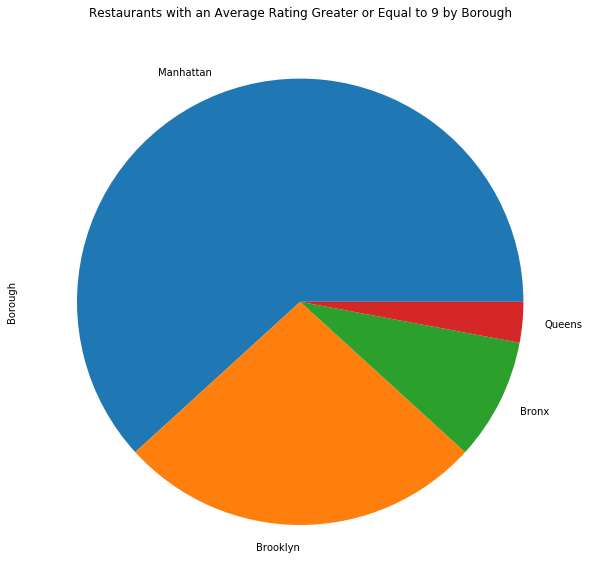

In [27]:
ax = jp_rest_stats_ny_best['Borough'].value_counts().plot(kind='pie',
                                    figsize=(10,20),
                                    title="Restaurants with an Average Rating Greater or Equal to 9 by Borough")

#### Neighborhoods with an Average Greater or Equal to 9

In [44]:
neighborhood_stats_best=neighborhood_stats[neighborhood_stats['Average Rating']>=9.0]
neighborhood_stats_best.sort_values('Average Rating', ascending=False)

Borough       Neighborhood   Latitude  Longitude  Average Rating  \
101      Manhattan    Stuyvesant Town  40.731000 -73.974052        9.200000   
36        Brooklyn  East Williamsburg  40.708492 -73.938858        9.100000   
35       Manhattan       East Village  40.727847 -73.982226        9.100000   
85        Brooklyn         North Side  40.714823 -73.958809        9.100000   
99        Brooklyn         South Side  40.710861 -73.958001        9.100000   
39       Manhattan           Flatiron  40.739673 -73.990947        9.066667   
84       Manhattan               Noho  40.723259 -73.988434        9.040000   
79       Manhattan      Midtown South  40.748510 -73.988713        9.033333   
19       Manhattan            Chelsea  40.744035 -74.003116        9.000000   
20   Staten Island            Chelsea  40.594726 -74.189560        9.000000   
21       Manhattan          Chinatown  40.715618 -73.994279        9.000000   
67       Manhattan       Little Italy  40.719324 -73.997305        9.000000   

                                              Label  
101                 Stuyvesant Town, Manhattan(9.2)  
36   East Williamsburg, Brooklyn(9.100000000000001)  
35                     East Village, Manhattan(9.1)  
85                        North Side, Brooklyn(9.1)  
99                        South Side, Brooklyn(9.1)  
39           Flatiron, Manhattan(9.066666666666666)  
84               Noho, Manhattan(9.040000000000001)  
79      Midtown South, Manhattan(9.033333333333333)  
19                          Chelsea, Manhattan(9.0)  
20                      Chelsea, Staten Island(9.0)  
21                        Chinatown, Manhattan(9.0)  
67                     Little Italy, Manhattan(9.0)

____

### Joining the Latitude and Longitude to the Neighborhood Datasets

##### All Restaurants

In [29]:
neighborhood_stats=pd.merge(neighborhood_stats,nydata, on='Neighborhood')
neighborhood_stats=neighborhood_stats[['Borough','Neighborhood','Latitude','Longitude','Average Rating']]
neighborhood_stats.head()

Borough       Neighborhood   Latitude  Longitude  Average Rating
0     Queens            Astoria  40.768509 -73.915654            8.20
1     Queens         Auburndale  40.761730 -73.791762            7.30
2   Brooklyn         Bath Beach  40.599519 -73.998752            7.14
3  Manhattan  Battery Park City  40.711932 -74.016869            8.90
4   Brooklyn          Bay Ridge  40.625801 -74.030621            7.70

#### Neighborhoods with an Average Rating Greater or Equal to 9

In [54]:
neighborhood_stats_best=pd.merge(neighborhood_stats_best,nydata, on='Neighborhood')
neighborhood_stats_best=neighborhood_stats_best[['Borough','Neighborhood','Latitude','Longitude','Average Rating']]

In [56]:
neighborhood_stats_best.sort_values('Average Rating', ascending=False).head()

Borough       Neighborhood   Latitude  Longitude  Average Rating
2057  Manhattan    Stuyvesant Town  40.731000 -73.974052             9.2
2050   Brooklyn  East Williamsburg  40.708492 -73.938858             9.1
2056   Brooklyn         South Side  40.710861 -73.958001             9.1
2055   Brooklyn         North Side  40.714823 -73.958809             9.1
2049  Manhattan       East Village  40.727847 -73.982226             9.1

### Japanese Restaurants in New York City with a Rating Greater or Equal to 9

In [59]:
jp_rest_stats_ny_best=pd.merge(jp_rest_stats_ny_best,nydata, on='Neighborhood')
jp_rest_stats_ny_best.head()

Borough_x      Neighborhood                        ID  \
0     Bronx         Riverdale  503cfaffe4b066d39de5005a   
1     Bronx       Kingsbridge  503cfaffe4b066d39de5005a   
2     Bronx    Spuyten Duyvil  503cfaffe4b066d39de5005a   
3  Brooklyn  Prospect Heights  41478600f964a520c41c1fe3   
4  Brooklyn      Williamsburg  4c7f0887fb74236a7727f9b9   

                       Name  Likes  Rating   Tips Borough_y   Latitude  \
0  Aoyu Japanese Restaurant   31.0     9.0   19.0     Bronx  40.890834   
1  Aoyu Japanese Restaurant   31.0     9.0   19.0     Bronx  40.881687   
2  Aoyu Japanese Restaurant   31.0     9.0   19.0     Bronx  40.881395   
3                     Geido  244.0     9.0   82.0  Brooklyn  40.676822   
4              Samurai Mama  888.0     9.1  242.0  Brooklyn  40.707144   

   Longitude  
0 -73.912585  
1 -73.902818  
2 -73.917190  
3 -73.964859  
4 -73.958115

____

### Generating Maps

##### Stabilishing the function geo_location for getting the coordenates

In [32]:
def geo_location(address):
    geolocator = Nominatim(user_agent="ny_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return latitude,longitude

#### Map: All Japanese Restaurants in New York City

In [33]:
from folium.plugins import MarkerCluster
ny_map = folium.Map(location=geo_location('New York'), zoom_start=10)
mc = MarkerCluster()

for lat, lng, in neighborhood_stats[['Latitude','Longitude']].values:
    mc.add_child(folium.Marker([lat, lng],))

neighborhood_stats['Label']=neighborhood_stats['Neighborhood']+', '+neighborhood_stats['Borough']+'('+neighborhood_stats['Average Rating'].map(str)+')'    
    
ny_map.add_child(mc)

#### Map: Japanese Restaurants in New York with a Rating Greater or Equal to 9 

In [34]:
ny_map_best = folium.Map(location=geo_location('New York'), zoom_start=11)
mc = MarkerCluster()

for lat, lng, in jp_rest_stats_ny_best[['Latitude','Longitude']].values:
    mc.add_child(folium.Marker([lat, lng],))

    
ny_map_best.add_child(mc)

#### Map: Neighborhoods in New York with an Average Rating Greater or Equal to 9 

In [35]:
ny_map_neighborhood_best = folium.Map(location=geo_location('New York'), zoom_start=11)
mc = MarkerCluster()

for lat, lng, in neighborhood_stats_best[['Latitude','Longitude']].values:
    mc.add_child(folium.Marker([lat, lng],))

    
ny_map_best.add_child(mc)

### Choropleth Map: Average Rating of Japanese Restaurants by Borough

In [36]:
ny_map_choropleth = folium.Map(location=geo_location('New York'), zoom_start=12)
ny_geo = r'Borough Boundaries.geojson'

ny_map_choropleth.choropleth(
    geo_data=ny_geo,
    data=borough_stats,
    columns=['Borough', 'Average Rating'],
    key_on='feature.properties.boro_name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Average Rating'
)

ny_map_choropleth

In [37]:
ny_map_choropleth.save('borough_rating.html')

The Map can be found at https://github.com/theravano/Coursera_Capstone/raw/master/borough_rating.html

____

## Discussion

* Brooklyn has the most Japanese Restaurants in New York City
* Brooklyn has the best rated Restaurant
* Manhattan has the Best Average Rating between the Buroughs
* Manhattan has the Most Likeds Japanese Restaurants
* Manhattan has the Neighborhood with most restaurants, Murray Hill,
* Manhattan has the Neighborhood with the best Average Rating, Stuyvesant Town

____

## Conclusion

### Even if Brooklyn has more Japanese Restaurants than any other Burrough, including the best rated, Manhattan still a better choice and representation of the japanese cousine, having better ratings and density.